# Building a SMS Spam Classifier

### Dataset information

Data set containing 5,572 Text Messages and their corresponding label (target): 
- **ham**: 4,828 observations
- **spam**: 747 observations

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## Data Preparation

In [57]:
sms = pd.read_table('data/sms.tsv', header=None, names=['label', 'message'])

In [58]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
for m in sms['message'][:5]:
    print(m, end='\n \n')

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
 
Ok lar... Joking wif u oni...
 
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
 
U dun say so early hor... U c already then say...
 
Nah I don't think he goes to usf, he lives around here though
 


In [60]:
# convert label to a numerical variable: 1 (positive class) will be "spam"
sms['target'] = (sms['label'] == 'spam').astype(int)
sms.drop('label', axis=1, inplace=True)

In [61]:
sms.head()

,message,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


## Text vector-representation (Bag of words)

In general (not only with bag of words) there are 2 steps to produce a vector representation for each document:

1. Learn the vocubulary in the corpus: this done using the fit method.
2. Use that vocabulary to produce the vector representation for each document: this is done using the transform method.

Scikit learn provides the <code>fit_transform</code> method to perfom the 2 steps at the same time.

## Example of Bag of words

In [62]:
# Example of a corpus. Corpus the set of all documets. A document is an oberservation (a message)
# Every word in the corpus is a feature
# The bag of words count how many times a word appear in a document
corpus = [
          'This is the first document',
          'This is the second second document',
          'And the third one. Yes, yes, yes this',
          'Is this the first document?'
         ]

In [63]:
# step1: learn the 'vocabulary' of the training data (occurs in-place)
vectorizer = CountVectorizer()
vectorizer.fit(corpus)

CountVectorizer()

In [64]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this', 'yes'], dtype=object)

In [65]:
# step 2: Vectorize the documents (dtm: document-token matrix)
X_dtm = vectorizer.transform(corpus)

In [66]:
# Bag of words representation
pd.DataFrame(data=X_dtm.toarray(), columns=vectorizer.get_feature_names(), index=['doc_'+str(i+1) for i in range(4)])

/Users/evahegnar/opt/miniconda3/envs/pred_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,document,first,is,one,second,the,third,this,yes
doc_1,0,1,1,1,0,0,1,0,1,0
doc_2,0,1,0,1,0,2,1,0,1,0
doc_3,1,0,0,0,1,0,1,1,1,3
doc_4,0,1,1,1,0,0,1,0,1,0


## Bag of words for SMS

In [67]:
target_name = 'target'
X = sms['message']
y = sms[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [68]:
# Instantiate the vectorizer
vect = CountVectorizer()
# Producing the document-token matrix (in one step)
X_train_dtm = vect.fit_transform(X_train)
# transform testing data (using fitted vocabulary) into a document-token matrix
X_test_dtm = vect.transform(X_test)

In [69]:
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(4457, 7631)
(1115, 7631)


In [70]:
def CMatrix(CM, labels=['ham','spam']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

## Building the classifier

We will use [multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification).

Precision: 99.29%
Accuracy: 99.1%
Recall: 93.96%


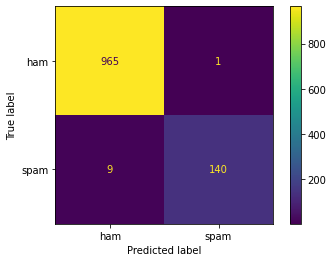

In [72]:
# 1. Import the estimator object (model)
from sklearn.naive_bayes import MultinomialNB

# 2. Create an instance of the estimator
nb = MultinomialNB()

# 3. Use the trainning data to train the estimator
nb.fit(X_train_dtm, y_train)

# 4. Evaluate the model
y_pred_test = nb.predict(X_test_dtm)
precision = precision_score(y_pred=y_pred_test, y_true=y_test)
accuracy = accuracy_score(y_pred=y_pred_test, y_true=y_test)
recall = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print(f"Precision: {round(100*precision, 2)}%")
print(f"Accuracy: {round(100*accuracy, 2)}%")
print(f"Recall: {round(100*recall, 2)}%")

disp = ConfusionMatrixDisplay(cm, display_labels=['ham', 'spam'])
disp.plot();

Precision is the porportion of cases where our cases are correct when we are predicting spam. 

** Lets predict the class for the following sms: **
1. "Today is your lucky day! claim $100 of free gas now! just text back saying YES."
2. "I have been calling you all day, r u comming back before dinner?"

In [32]:
def spam_filter(text_message):
    """Accepts a string containing a text message and classifies it as spam or ham"""
    prediction = nb.predict(vect.transform([text_message]))[0]
    print(text_message)
    if prediction:
        return "SPAM"
    else:
        return "HAM"

In [33]:
sms1 = "Today is your lucky day! claim $100 of free gas now! just text back saying YES."
sms2 = "I have been calling you all day, r u comming back before dinner?"

In [34]:
spam_filter(sms2)

I have been calling you all day, r u comming back before dinner?


'HAM'

## Congratulations! you have built your first text classifier!